<a href="https://colab.research.google.com/github/satyam-07/ML_projects_Fastai/blob/main/ML_PROJECT_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)


Mounted at /content/gdrive


In [ ]:
!pip install fastbook --upgrade

Requirement already up-to-date: fastbook in /usr/local/lib/python3.7/dist-packages (0.0.16)


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
!pip install jmd-imagescraper
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
path=Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3')

In [ ]:
path.ls()

(#2) [Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3/train'),Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3/test')]

In [ ]:
display_image_cleaner(path/'train')

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [ ]:
fns=get_image_files(path/'train')
fns

(#2084) [Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3/train/non/No Finding-patient12937-study1-view1_frontal.jpg'),Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3/train/non/No Finding-patient11129-study1-view1_frontal.jpg'),Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3/train/non/No Finding-patient12295-study1-view1_frontal.jpg'),Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3/train/non/No Finding-patient11010-study3-view1_frontal.jpg'),Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3/train/non/No Finding-patient11297-study1-view1_frontal.jpg'),Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3/train/non/No Finding-patient11628-study1-view1_frontal.jpg'),Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3/train/non/No Finding-patient15761-study1-view1_frontal.jpg'),Path('/content/gdrive/My Drive/data_upload_v3/data_upload_v3/train/non/No Finding-patient14315-study1-view1_frontal.jpg'),Path('/content/

In [ ]:
failed=verify_images(fns)
failed

(#0) []

In [ ]:
from fastai.vision import *
x_ray=DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,splitter=RandomSplitter(valid_pct=0.2,seed=42),get_y=parent_label,item_tfms=RandomResizedCrop(224))
dls=x_ray.dataloaders(path)


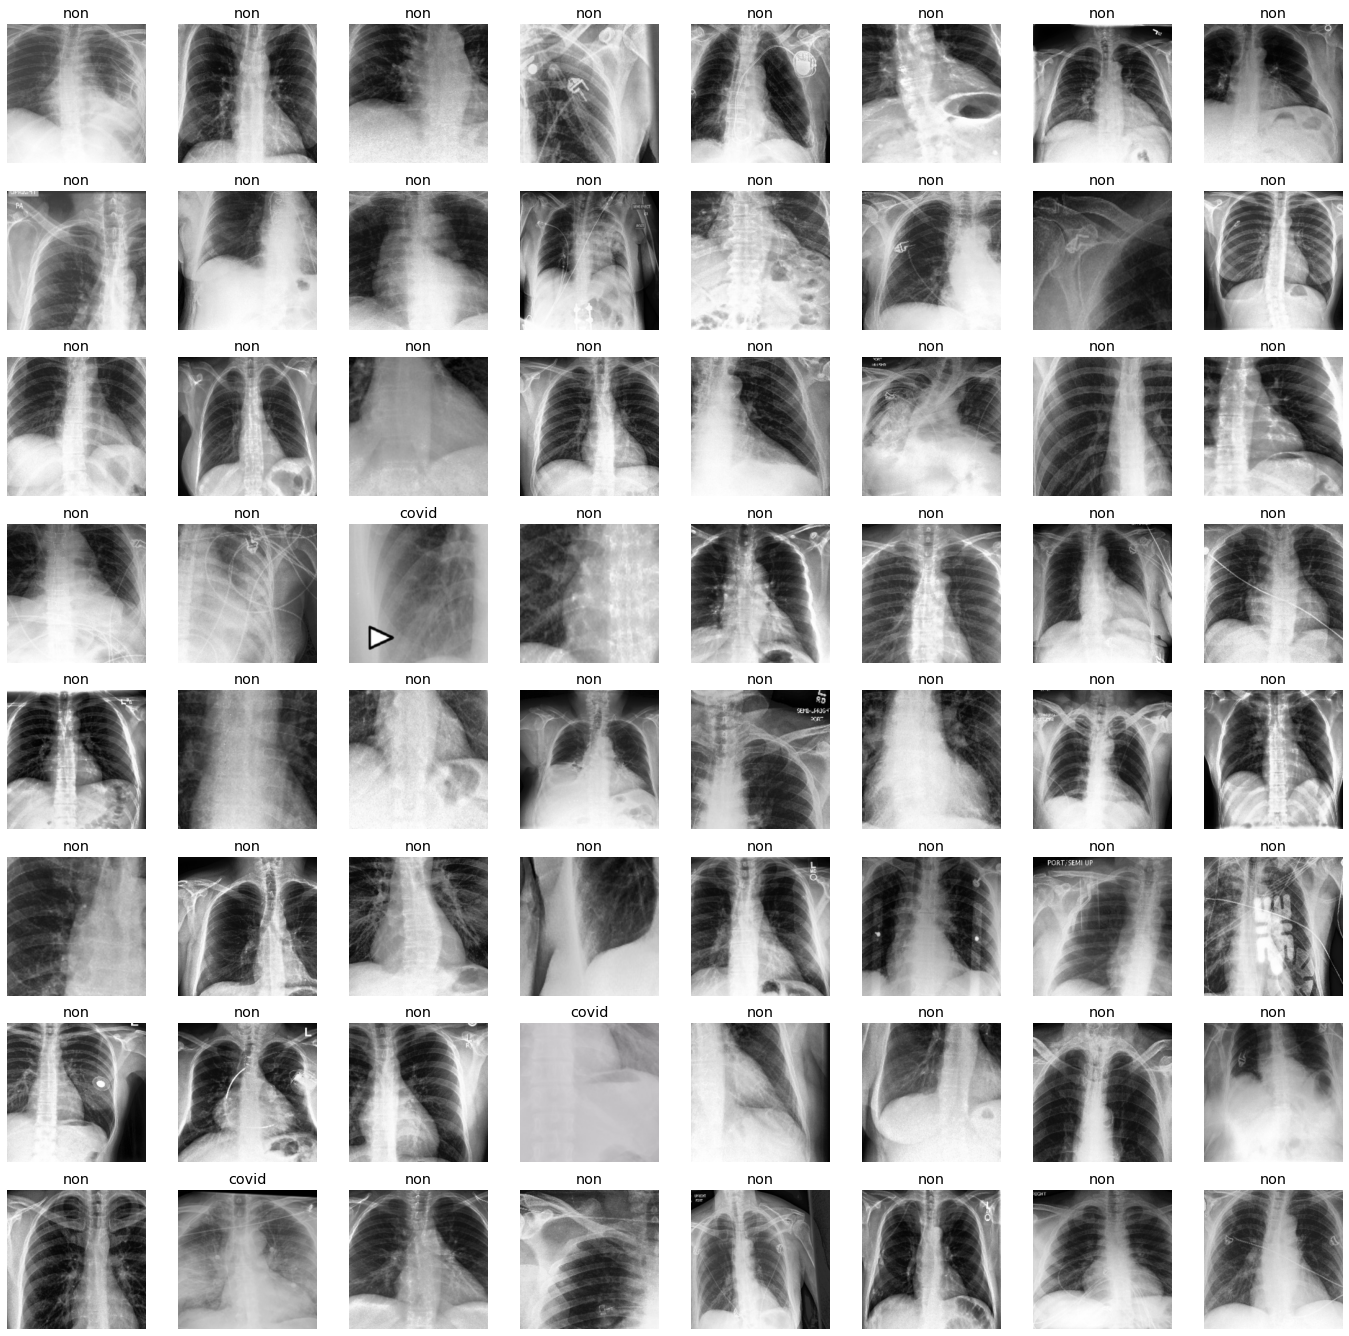

In [ ]:
dls.show_batch(max_n=100)


In [ ]:
learn1=cnn_learner(dls,resnet18,metrics=error_rate)
learn1.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.852552,0.317426,0.126326,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.349619,0.112064,0.017358,00:34
1,0.202594,0.036473,0.007715,00:34
2,0.104548,0.014009,0.004822,00:34
3,0.058530,0.013765,0.004822,00:34
4,0.040676,0.013153,0.002893,00:34
5,0.021063,0.007961,0.002893,00:34
6,0.013778,0.008128,0.002893,00:34
7,0.015676,0.008136,0.002893,00:34


In [ ]:
learn2=cnn_learner(dls,resnet18,metrics=error_rate)
learn2.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.861494,0.472620,0.215043,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.335568,0.126478,0.018322,00:34
1,0.168631,0.029136,0.002893,00:34
2,0.093492,0.019814,0.002893,00:34
3,0.067943,0.023570,0.003857,00:34


In [ ]:
learn3=cnn_learner(dls,resnet18,metrics=error_rate,cbs=MixUp(alpha=1.))
learn3.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.878470,0.314754,0.131148,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.358668,0.134344,0.023144,00:34
1,0.224698,0.027563,0.007715,00:34
2,0.152486,0.028232,0.007715,00:34
3,0.131895,0.023847,0.003857,00:34


In [ ]:
learn=cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(8,cbs=MixUp(1.))

epoch,train_loss,valid_loss,error_rate,time
0,0.890523,0.199587,0.061716,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.393429,0.141757,0.028930,00:34
1,0.280457,0.052937,0.008679,00:34
2,0.183084,0.026639,0.007715,00:34
3,0.132344,0.061532,0.021215,00:35
4,0.109770,0.041323,0.011572,00:34
5,0.101234,0.020624,0.006750,00:34
6,0.099510,0.025367,0.008679,00:34
7,0.091379,0.021306,0.006750,00:34


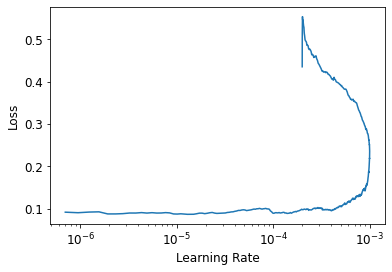

In [ ]:
learn.recorder.plot_lr_find()

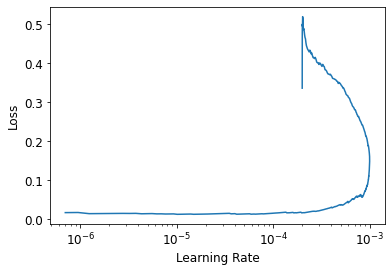

In [ ]:
learn1.recorder.plot_lr_find()

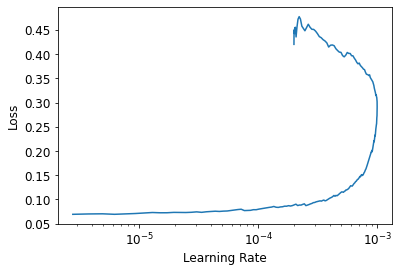

In [ ]:
learn2.recorder.plot_lr_find()

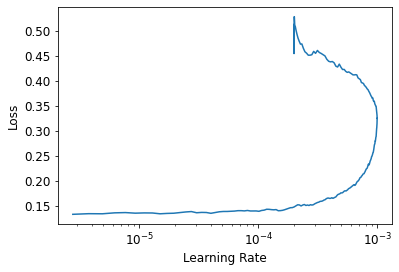

In [ ]:
learn3.recorder.plot_lr_find()

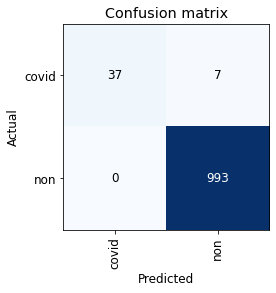

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

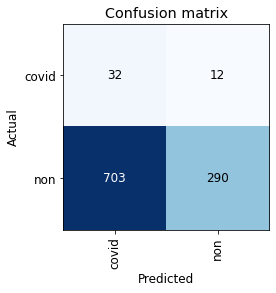

In [ ]:
interp1=ClassificationInterpretation.from_learner(learn1)
interp1.plot_confusion_matrix()

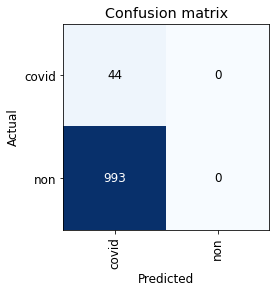

In [ ]:
interp2=ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix()

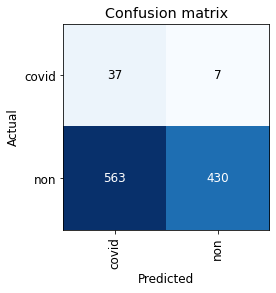

In [ ]:
interp3=ClassificationInterpretation.from_learner(learn3)
interp3.plot_confusion_matrix()

In [ ]:
learn.unfreeze() 
learn.fit_one_cycle(10,lr_max = 1e-4,cbs=MixUp(1.))

epoch,train_loss,valid_loss,error_rate,time
0,0.083420,0.021448,0.006750,00:34
1,0.084624,0.025370,0.006750,00:34
2,0.085507,0.033185,0.007715,00:34
3,0.089029,0.043500,0.007715,00:34
4,0.083906,0.013672,0.002893,00:34
5,0.078005,0.012464,0.002893,00:34
6,0.076748,0.019380,0.004822,00:34
7,0.074704,0.018987,0.004822,00:34
8,0.073163,0.014225,0.002893,00:34
9,0.076275,0.014010,0.002893,00:34


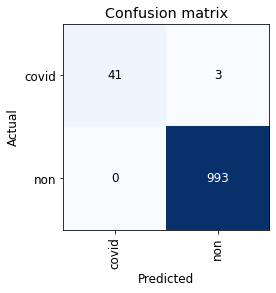

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

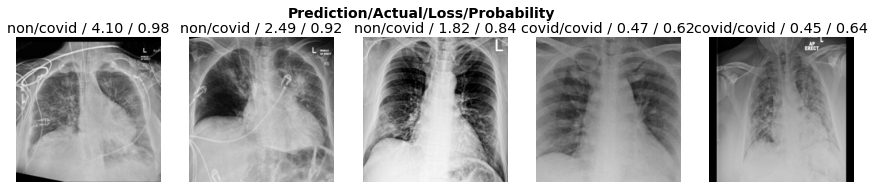

In [ ]:
interp.plot_top_losses(5,nrows=1)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf=load_learner(path/'export.pkl')

In [ ]:
uploader = widgets.FileUpload(width='auto')
uploader.style.button_color = 'lightgreen'

In [ ]:
out_pl = widgets.Output()

In [ ]:
lbl_pred = widgets.Label()

In [ ]:
btn_run = widgets.Button(description='Classify',width='50%')
btn_run.style.button_color = 'lightgreen'

In [ ]:
def on_click_classify(change):
    img = PILImage.create(uploader.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn_inf.predict(img)
    if pred=='non':
      pred='Sars CoV2 NEGATIVE'
    else:
      pred='Sars CoV2 POSITIVE'
    lbl_pred.value = 'PREDICTION: {0}; \nPROBABILITY: {1}'.format(pred,probs[pred_idx])

btn_run.on_click(on_click_classify)

In [ ]:
box_layout = Layout(display='flex-inline',
                    flex_flow='column',
                    align_items='stretch',
                    border='solid',
                    width='50%',
                    justify_content='flex-end',
                    justify_items='center',
                    object_fit='fill'
                    )

In [ ]:
VBox([widgets.Label('INPUT A X-RAY RESULT'),uploader, btn_run, out_pl, lbl_pred],layout=box_layout)
